## CONVOLUTIONAL NEURAL NETWORK FRUITS

### CNN STRUCTURE:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

n=10 #number of epochs
datatrain="data/Training"
datatest="data/Test"
img=(100,100)
batchsize=30

print("Loading new Model")
    
train_dataset = tf.keras.utils.image_dataset_from_directory(
    datatrain,
    label_mode='categorical',
    image_size=img,
    batch_size=batchsize
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    datatest,
    label_mode='categorical',
    image_size=img,
    batch_size=batchsize
)

model = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(100,100,3)),
tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=64, activation='relu'),
tf.keras.layers.Dropout(0.1), 
tf.keras.layers.Dense(units=206, activation='softmax')
])
    



2025-08-11 12:09:50.548081: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-11 12:09:51.068791: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-11 12:09:53.246487: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-11 12:09:53.263134: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-11 12:09:58.139800: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Loading new Model
Found 103993 files belonging to 206 classes.
Found 34711 files belonging to 206 classes.


In [2]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [3]:
history=model.fit(
    train_dataset,
    epochs=n,
    validation_data=test_dataset
)

Epoch 1/10
3467/3467 [==============================] - 252s 72ms/step - loss: 0.7744 - accuracy: 0.7947 - val_loss: 0.2026 - val_accuracy: 0.9420
Epoch 2/10
3467/3467 [==============================] - 232s 67ms/step - loss: 0.1344 - accuracy: 0.9543 - val_loss: 0.1498 - val_accuracy: 0.9637
Epoch 3/10
3467/3467 [==============================] - 203s 59ms/step - loss: 0.0924 - accuracy: 0.9693 - val_loss: 0.1534 - val_accuracy: 0.9625
Epoch 4/10
3467/3467 [==============================] - 201s 58ms/step - loss: 0.0716 - accuracy: 0.9760 - val_loss: 0.1217 - val_accuracy: 0.9677
Epoch 5/10
3467/3467 [==============================] - 223s 64ms/step - loss: 0.0602 - accuracy: 0.9804 - val_loss: 0.2018 - val_accuracy: 0.9591
Epoch 6/10
3467/3467 [==============================] - 225s 65ms/step - loss: 0.0518 - accuracy: 0.9834 - val_loss: 0.1863 - val_accuracy: 0.9664
Epoch 7/10
3467/3467 [==============================] - 209s 60ms/step - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

### PERFORMANCE GRAPHS:

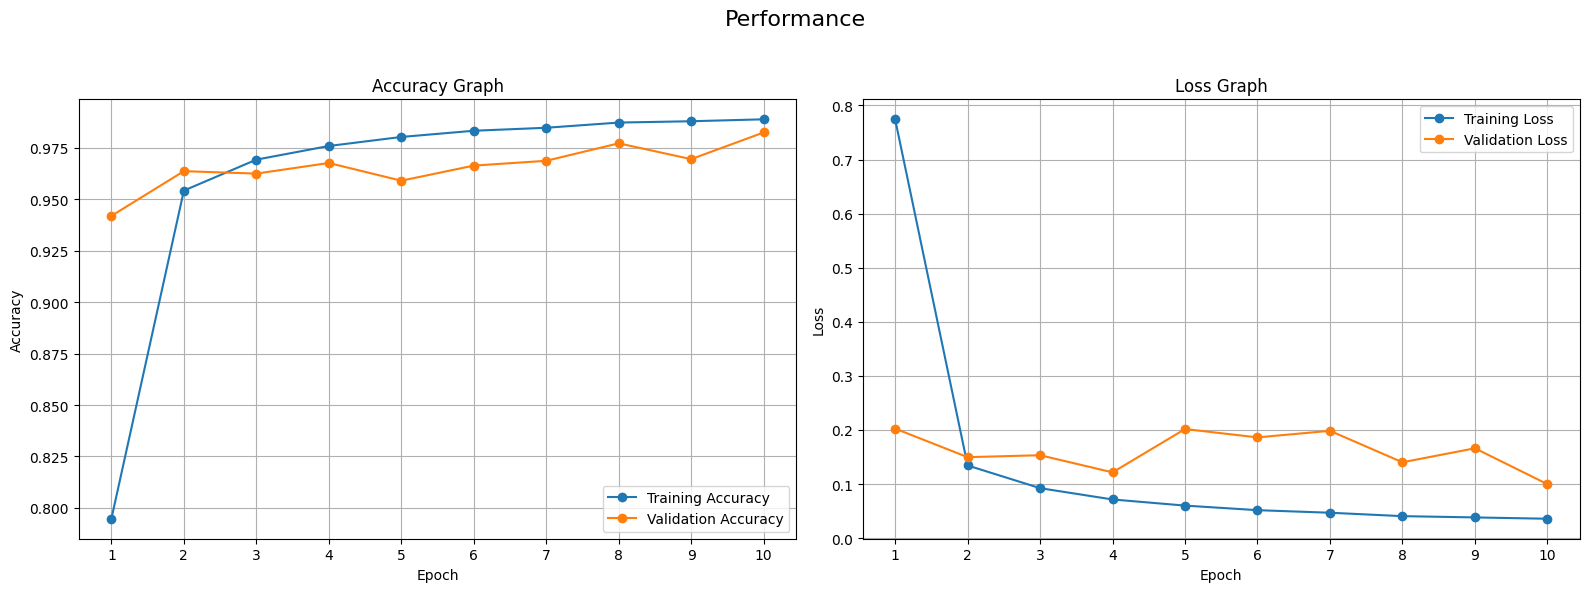

In [7]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_labels=[]
for i in range(len(acc)):
    epochs_labels.append(i+1)

#Accuracy Graph
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.xticks(ticks=range(len(acc)),labels=epochs_labels)
plt.plot(range(len(acc)),acc,'o-',label='Training Accuracy')
plt.plot(range(len(acc)),val_acc,'o-',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

#Loss Graph
plt.subplot(1,2,2)
plt.xticks(ticks=range(len(acc)), labels=epochs_labels)
plt.plot(range(len(acc)),loss,'o-',label='Training Loss')
plt.plot(range(len(acc)),val_loss,'o-',label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Performance', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()




### Test on random fruits:

Accuracy: 97.57%
Correct Guesses: 201/206
Mistakes: 5


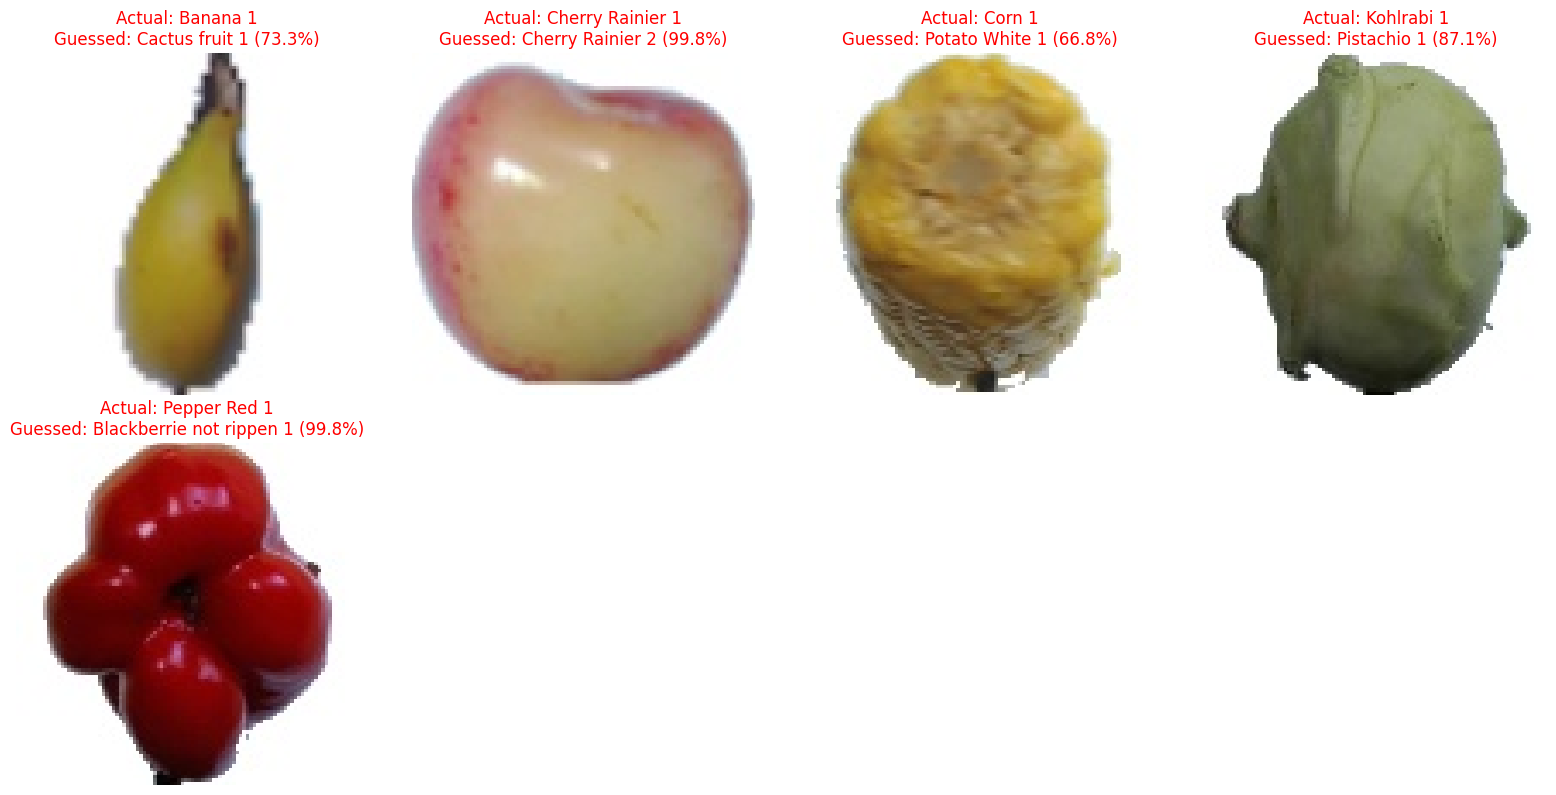

In [10]:
import random
def predict_image(image_path):
    image=tf.keras.utils.load_img(image_path, target_size=(100, 100))
    image_array=tf.keras.utils.img_to_array(image)
    image_batch=np.expand_dims(image_array, axis=0)
    scores=model.predict(image_batch, verbose=0)
    best_guess_index=np.argmax(scores[0])
    predicted_label=class_names[best_guess_index]
    confidence=100*np.max(scores[0])
    return predicted_label,confidence

folder="data/Test"
class_names=sorted(os.listdir(folder))
mistakes=[]
correct_guesses=0

for actual_label in class_names:
    image_folder=os.path.join(folder,actual_label)
    random_image_file=random.choice(os.listdir(image_folder))
    path_to_image=os.path.join(image_folder,random_image_file)
    
    predicted_label,confidence=predict_image(path_to_image)
    
    if predicted_label==actual_label:
        correct_guesses+=1
    else:
        mistakes.append({
            "path":path_to_image,
            "actual":actual_label,
            "guess":predicted_label,
            "confidence":confidence
        })

total_images=len(class_names)
accuracy=(correct_guesses/total_images)*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Correct Guesses: {correct_guesses}/{total_images}")
print(f"Mistakes: {len(mistakes)}")

if mistakes:
    num_mistakes=len(mistakes)
    num_cols=4
    num_rows=(num_mistakes+num_cols-1)//num_cols
    
    plt.figure(figsize=(16,4*num_rows))
    
    for i,mistake in enumerate(mistakes):
        plt.subplot(num_rows, num_cols, i+1)
        
        image=tf.keras.utils.load_img(mistake["path"])
        plt.imshow(image)
        plt.axis('off')
        
        plt.title(
            f"Actual: {mistake['actual']}\n"
            f"Guessed: {mistake['guess']} ({mistake['confidence']:.1f}%)",
            color='red'
        )
        
    plt.tight_layout()
    plt.show()
else: 
    print("\nThe model made no mistakes in this test")

### REPORT:

In [9]:
from sklearn.metrics import classification_report

ytrue=[]
ypred=[]

for image_batch,label_batch in test_dataset:
    ytrue.extend(np.argmax(label_batch,axis=1))
    preds=model.predict(image_batch,verbose=0)
    ypred.extend(np.argmax(preds,axis=1))

print("\nFinal Report:")
print(classification_report(ytrue,ypred,target_names=test_dataset.class_names))



Final Report:
                           precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 11       1.00      1.00      1.00       142
                 Apple 12       1.00      1.00      1.00       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       1.00      1.00      1.00       154
                 Apple 17       1.00      1.00      1.00       201
                 Apple 18       1.00      1.00      1.00       160
                 Apple 19       1.00      1.00      1.00       241
                  Apple 5       1.00      1.00      1.00       146
                  Apple 6       0.92      1.00      0.96       157
                  Apple 7       1.00      1.00      1.00       229
                  Apple 8       1.00      1.00      1.00       228
                  Apple 9       1.00      1.00      1.00       231
         Apple Braeburn 1       0.92      0.77

### CONFUSION MATRIX:

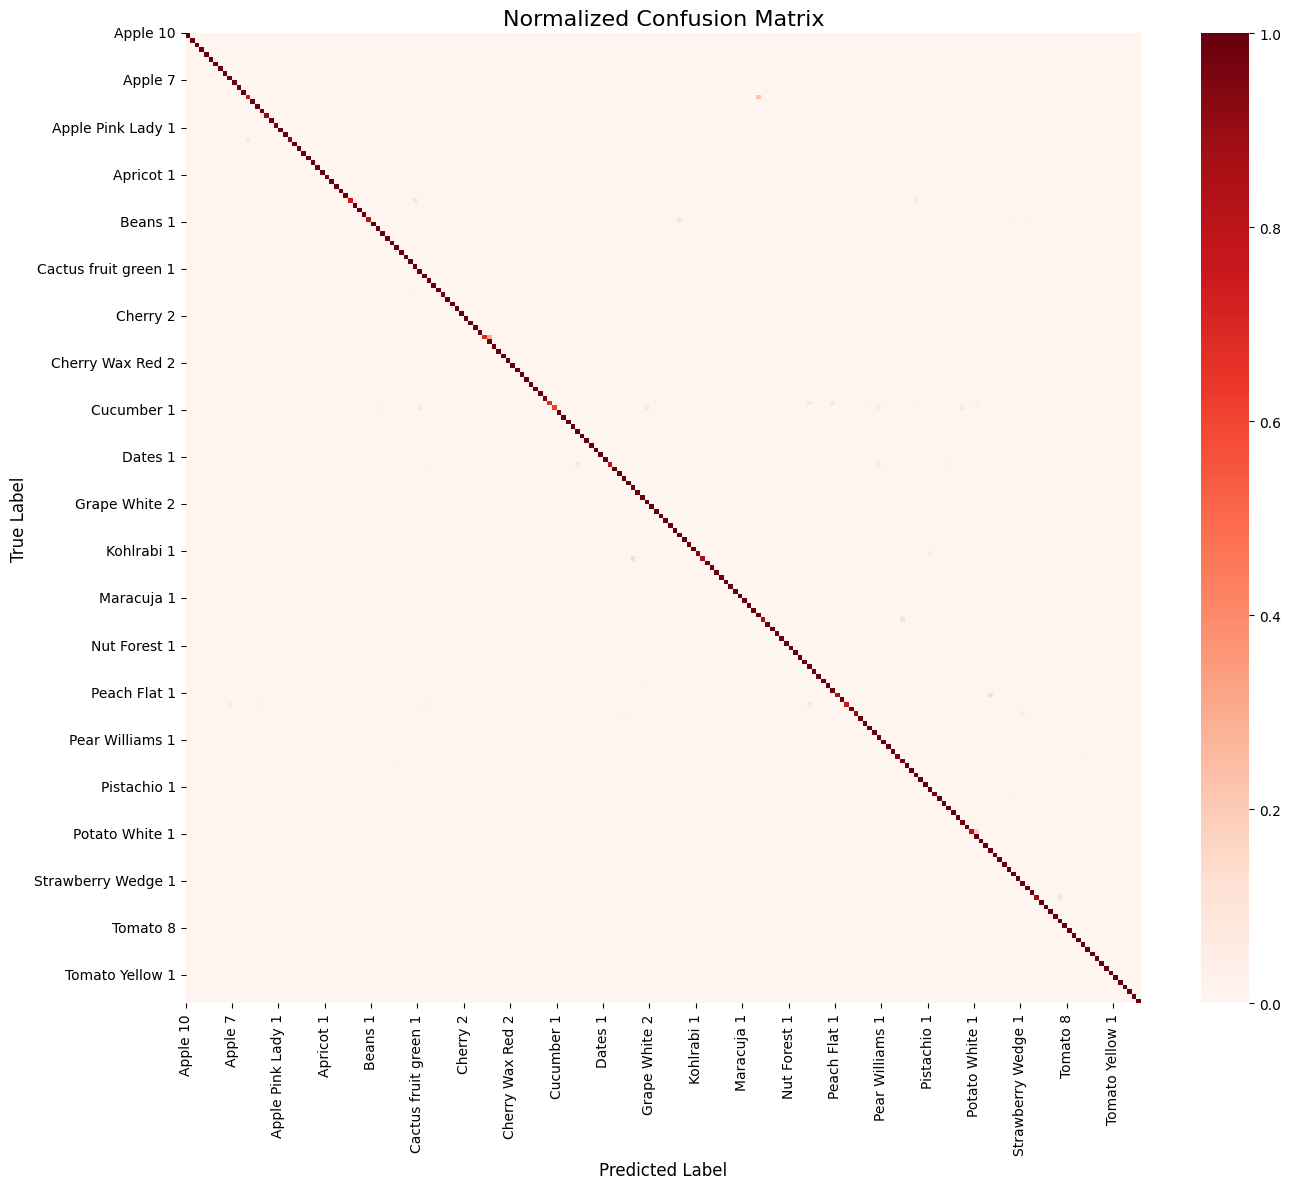

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytrue,ypred,normalize='true')
plt.figure(figsize=(14,12))
sns.heatmap(cm,annot=False,cmap='Reds')

plt.title("Normalized Confusion Matrix",fontsize=16)
plt.ylabel("True Label",fontsize=12)
plt.xlabel("Predicted Label",fontsize=12)

spacing=10  #show 1/10 classes every time
positions=[] #numeric position of the labels
labels=[]  # name of classes

for i,class_name in enumerate(class_names):
    if i%spacing==0:
        positions.append(i)
        labels.append(class_name)

plt.xticks(positions,labels,rotation=90)
plt.yticks(positions,labels)
plt.tight_layout()
plt.show()